# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & 
             (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & 
             (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
data.groupby('children')['debt'].value_counts()

children  debt
0         0       13028
          1        1063
1         0        4364
          1         444
2         0        1858
          1         194
3         0         303
          1          27
4         0          37
          1           4
5         0           9
Name: debt, dtype: int64

In [23]:
data.groupby('children')['debt'].mean() * 100

children
0    7.543822
1    9.234609
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64

In [24]:
import seaborn as sb

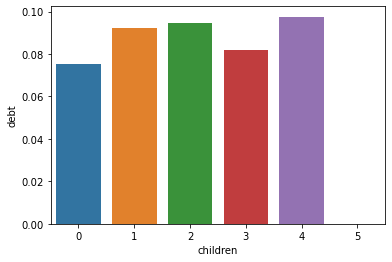

In [25]:
sb.barplot(x=data['children'], y=data['debt'], data=data, ci=None);

In [26]:
data.pivot_table(index='children', values='debt', 
                 aggfunc = ['mean', 'count', 'sum'])

,mean,count,sum
,debt,debt,debt
children,,,
0,0.075438,14091,1063
1,0.092346,4808,444
2,0.094542,2052,194
3,0.081818,330,27
4,0.097561,41,4
5,0.000000,9,0


**Вывод:** Прямой зависимости между количеством детей и возвратом кредита в срок не наблюдается. 
Мы можем заметить, что семьи с 5 детьми всегда возвращают кредиты в срок, однако в выборе таких семей всего 9, так что полноценных выводов именно по их поводу мы сделать не можем. 
Далее идуют семьи, у которых детей нет. У них относительно низкий показатель задолжености, из-за чего можно предположить, что траты и расходы в данной группе семей более систематизированы, возникает меньше спонтанных трат, благодаря чему люди своевременно выплачивают кредиты. 
Самая высокая доля с невозвратом кредита в срок наблюдается у семей с 4 детьми, далее идут с 2, 3 и с 1 ребёнком в семье.

#### Доля задолженностей по группам:
* нет детей - 7.54%
* 1 ребенок - 9.23%
* 2 ребенка - 9.45%
* 3 ребенка - 8.18%
* 4 ребенка - 9.76%
* 5 детей - 0%, малая выборка, рекомендуется продолжить исследование

##### Наблюдается следующая зависимость:
* Наименьшая доля задолженность у семей без детей - 7,54%
* У семей с детьми % задолженности выше - 9,23%, 9,45% и 9,76%, однако у семей с 3 детьми задолженность составляет 8,18%, однако это может свидетельствовать о недостаточной выборке. 
* Рекомендуется продолжить исследование по семьям с 3 и 5 детьми. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
data.groupby('family_status')['debt'].mean() * 100

family_status
Не женат / не замужем    9.763948
в разводе                7.064760
вдовец / вдова           6.624606
гражданский брак         9.313014
женат / замужем          7.560558
Name: debt, dtype: float64

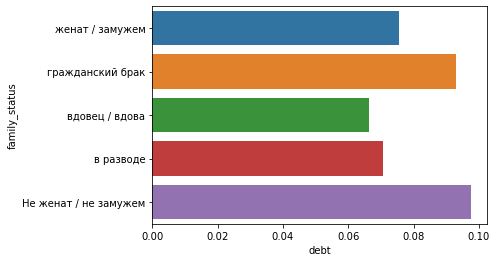

In [28]:
sb.barplot(x=data['debt'], y=data['family_status'], data=data, ci=None);

In [29]:
data.pivot_table(index='family_status', values='debt', 
                 aggfunc = ['mean', 'count', 'sum'])

,mean,count,sum
,debt,debt,debt
family_status,,,
Не женат / не замужем,0.097639,2796,273
в разводе,0.070648,1189,84
вдовец / вдова,0.066246,951,63
гражданский брак,0.093130,4134,385
женат / замужем,0.075606,12261,927


**Вывод:** Зависимость между семейным положением и возвратом кредита в срок есть.
Люди, не находящиеся замужем или не женатые (9,76%), а так же те, кто состоит в гражданском браке (9,31%) имеют больший процент задолженностей по кредитам.
Женат/замужем - 7,56%
Вдовец/вдова - 6,62%
В разводе - 7,06%

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [30]:
data.groupby('total_income_category')['debt'].mean() * 100

total_income_category
A    8.000000
B    7.060231
C    8.498210
D    6.017192
E    9.090909
Name: debt, dtype: float64

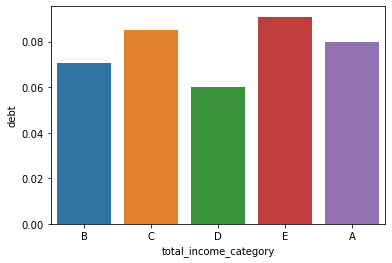

In [31]:
sb.barplot(x=data['total_income_category'], y=data['debt'], data=data, ci=None);

In [32]:
data.pivot_table(index='total_income_category', values='debt', 
                 aggfunc = ['mean', 'count', 'sum'])

,mean,count,sum
,debt,debt,debt
total_income_category,,,
A,0.080000,25,2
B,0.070602,5014,354
C,0.084982,15921,1353
D,0.060172,349,21
E,0.090909,22,2


**Вывод:** Прямой зависимости между уровнем дохода и возвратом кредита в срок не наблюдается. 
Люди с заработком 30000-50000 (категория D) чаще выплачивают кредиты в срок - 6%. 
Лица с наименьшей заработной платой (категория E) чаще остальных имеют задолженности по кредитам - 9,09%. За ними идут лица категории C - 8,5%, A - 8% и B - 7,06%.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [33]:
data.groupby('purpose_category')['debt'].mean() * 100

purpose_category
операции с автомобилем      9.347978
операции с недвижимостью    7.255139
получение образования       9.252758
проведение свадьбы          7.911803
Name: debt, dtype: float64

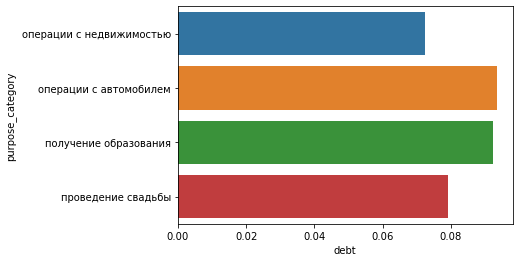

In [34]:
sb.barplot(x=data['debt'], y=data['purpose_category'], data=data, ci=None);

In [35]:
data.pivot_table(index='purpose_category', values='debt', 
                 aggfunc = ['mean', 'count', 'sum'])

,mean,count,sum
,debt,debt,debt
purpose_category,,,
операции с автомобилем,0.093480,4279,400
операции с недвижимостью,0.072551,10751,780
получение образования,0.092528,3988,369
проведение свадьбы,0.079118,2313,183


**Вывод:** Процент людей с зажолженностями по кредитам на получение образования(9,25%) и операции с автомобилем(9,35%) выше остальных. Можно предположить, что люди с кредитом на получение образования рассчитывают на более высокооплачиваемую работу во время учёбы и после, чем та, на которую удаётся устроиться на самом деле. 
Проведение свадьбы - 7,91%
Операции с недвижимостью - 7,25%

In [36]:
data_pivot = data.pivot_table(
    index = ['children', 'total_income_category'],
    columns = ['family_status', 'purpose_category'],
    values = 'debt', aggfunc=['mean'])

In [37]:
data_pivot

mean  \
family_status                   Не женат / не замужем   
purpose_category               операции с автомобилем   
children total_income_category                          
0        A                                        NaN   
         B                                   0.117647   
         C                                   0.123737   
         D                                   0.333333   
         E                                        NaN   
1        A                                   0.000000   
         B                                   0.055556   
         C                                   0.164384   
         D                                   0.000000   
         E                                        NaN   
2        A                                        NaN   
         B                                   0.250000   
         C                                   0.250000   
         D                                        NaN   
         E                                        NaN   
3        A                                        NaN   
         B                                   0.000000   
         C                                   0.000000   
         D                                        NaN   
4        B                                        NaN   
         C                                        NaN   
5        B                                        NaN   
         C                                        NaN   
         D                                        NaN   

                                                                               \
family_status                                                                   
purpose_category               операции с недвижимостью получение образования   
children total_income_category                                                  
0        A                                     0.000000                   NaN   
         B                                     0.076677              0.104348   
         C                                     0.074346              0.112760   
         D                                     0.000000              0.200000   
         E                                     0.000000                   NaN   
1        A                                          NaN                   NaN   
         B                                     0.121212              0.095238   
         C                                     0.111111              0.100000   
         D                                          NaN                   NaN   
         E                                          NaN                   NaN   
2        A                                          NaN                   NaN   
         B                                     0.000000              0.000000   
         C                                     0.090909              0.083333   
         D                                          NaN                   NaN   
         E                                          NaN                   NaN   
3        A                                          NaN                   NaN   
         B                                          NaN                   NaN   
         C                                     0.500000              0.000000   
         D                                          NaN                   NaN   
4        B                                          NaN                   NaN   
         C                                     1.000000              0.000000   
5        B                                          NaN                   NaN   
         C                                          NaN                   NaN   
         D                                          NaN                   NaN   

                                                       \
family_status                               в разводе   
purpose_category               операции с автомобилем   
children tot

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
 * Одной из возможных причин появления пропусков в данных является технический сбой. 
 * Также это может быть намеренное сокрытые информации, из-за чего человек ставит пропуск/пробел, либо случайный пропуск, если данный пункт не является обязательным в заполнении данных.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
* Медианные значения являются типичными для определённой выборки. Если пропуски будут заполняться другими значениями, вероятность сделать неправильные выводы занчительно увеличивается. 
* Медиана это число в середине. В отличие от среднего оно не подсчитывается сложением всех чисел, делённых на их количество. 
* Медиану лучше применять, когда в данных имеется сильный разброс. 

### Шаг 4: общий вывод.

В данном проекте было проведено исследование по поводу влияния различных факторов на погашение кредитов в срок. 
Заказчик — кредитный отдел банка. 

Нужно было ответить на следующие вопросы:
Есть ли зависимость между количеством детей и возвратом кредита в срок?
Есть ли зависимость между семейным положением и возвратом кредита в срок?
Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
Как разные цели кредита влияют на его возврат в срок?

В результате удалось сделать следующие выводы:

1. Наблюдается следующая зависимость: 
Самая высокая доля с невозвратом кредита в срок наблюдается у семей с 4 детьми, далее идут с 2, 3 и с 1 ребёнком в семье. Выборка про семьи с 5 детьми недостаточная (всего 9 человек), рекомендуется продолжить исследование. Самая низкая доля по невозвратам у семей без детей.
* нет детей - 7.54%
* 1 ребенок - 9.23%
* 2 ребенка - 9.45%
* 3 ребенка - 8.18%
* 4 ребенка - 9.76%
* 5 детей - 0%, малая выборка
* рекомендуется продолжить исследование по группам с 3 и 5 детьми


2. Зависимость между семейным положением и возвратом кредита в срок наблюдается. 
Люди, не находящиеся замужем или не женатые (9,76%), а так же те, кто состоит в гражданском браке (9,31%), имеют больший процент задолженностей по кредитам.
Лица женатые/замужем (7,56%), вдовы/вдовцы (6,62%) и разведённые (7,06%) имеют меньший процент невозвратов в срок. 


3. Прямой зависимости по заработной плате и выплатам в срок не выявлено. 
Люди с заработком 30000-50000 (категория D) чаще выплачивают кредиты в срок - 6%. 
Лица с наименьшей заработной платой (категория E) чаще остальных имеют задолженности по кредитам - 9,09%. За ними идут лица категории C - 8,5%, A - 8% и B - 7,06%.


4. Зависимость между целями кредитов и выплатами в срок есть. 
Процент людей с зажолженностями по кредитам на получение образования(9,25%) и операции с автомобилем(9,35%) выше остальных. Можно предположить, что люди с кредитом на получение образования рассчитывают на более высокооплачиваемую работу во время учёбы и после, чем та, на которую удаётся устроиться на самом деле. 
Проведение свадьбы - 7,91%
Операции с недвижимостью - 7,25%

##### Рекомендации:
* Следует собрать большую выборку среди многодетных семей (3 и 5 детей). 
* Следует объединять больше количество факторов для нахождения больших закономерностей, например, учитывать количество детей, их возраст и уровень дохода вместе. 